In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import numpy as np
import math
from IPython.display import Image
from graphviz import Digraph

/var/folders/z_/xphnyhxs03sg7p8v5dgkr10w0000gn/T/ipykernel_37486/3313759999.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Let us start by implementing our Node and Graph data structure to incorporate weights in the graph

In [2]:
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        
        self.status = "unvisited"
        self.estD = np.inf
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        
        return False
        
    def hasInNeighbor(self, v):
        
        if v in self.inNeighbors:
            return True
        
        return False
    
    def hasNeighbor(self, v):
        
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        
        return False
    
    def getOutNeighbors(self):
        
        return self.outNeighbors
    
    def getInNeighbors(self):
        
        return self.inNeighbors
    
    def getOutNeighborsWithWeights(self):
        
        return self.outNeighbors
    
    def getInNeighborsWithWeights(self):
        
        return self.inNeighbors
    
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
    
    def addOutNeighbor(self,v,wt):
        
        self.outNeighbors.append((v,wt))
    
    def addInNeighbor(self,v,wt):
        
        self.inNeighbors.append((v,wt))
        
        
    def __str__(self):
        
        return str(self.value) 

In [10]:
class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
        
    def addDiEdge(self, u, v, wt = 1):
        
        u.addOutNeighbor(v, wt = wt)
        v.addInNeighbor(u, wt = wt)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v, wt = 1):
        
        self.addDiEdge(u, v, wt = wt)
        self.addDiEdge(v, u, wt = wt)
        
            
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):
        
        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):
            
            if v.hasOutNeighbor(u) and u.hasInNeighbor(v): 
                return
        
            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)        
                
    def __str__(self):
        
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            # ret += "(" + str(a) + "," + str(b) + ") "
            ret +=  "(" + str(a) + "," + str(b[0]) + "," + str(b[1]) + ") "
        ret += "\n"
        return ret

Now that we have incorporated the weights, let us devise a plan to generate the graph

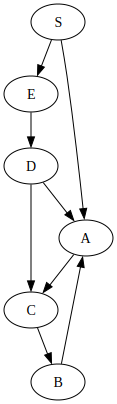

In [11]:
dot = Digraph()

dot.edge('S', 'E')
dot.edge('S', 'A')
dot.edge('E', 'D')
dot.edge('D', 'A')
dot.edge('A', 'C')
dot.edge('B', 'A')
dot.edge('D', 'C')
dot.edge('C', 'B')

#dot.view()
dot

In [12]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'E', 'A', 'D', 'B', 'C']:
    G.addVertex( Node(i) )

In [13]:
V = G.vertices

#dot.edge('S', 'E')
G.addDiEdge( V[0], V[1], 8)

#dot.edge('S', 'A')
G.addDiEdge( V[0], V[2] , 10)

#dot.edge('E', 'D')
G.addDiEdge( V[1], V[3], 1)

#dot.edge('D', 'A')
G.addDiEdge( V[3], V[2], -4)

#dot.edge('A', 'C')
G.addDiEdge( V[2], V[5], 2)

#dot.edge('B', 'A')
G.addDiEdge( V[4], V[2], 1 )

#dot.edge('D', 'C')
G.addDiEdge( V[3], V[5], -1)

#dot.edge('C', 'B')
G.addDiEdge( V[5], V[4], -2 )

Second Example

In [14]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'A', 'B']:
    G.addVertex( Node(i) )
    
V = G.vertices

G.addDiEdge( V[0], V[1], 3)

G.addDiEdge( V[0], V[2] , 4)

G.addDiEdge( V[2], V[1], -2)

In [15]:
print(G)

Graph with:
	 Vertices:
	S,A,B,
	 Edges:
	(S,A,3) (S,B,4) (B,A,-2) 



***

### Section 2: Dijkstra Algorithm

In [16]:
def dijkstra(w, G):
    
    for v in G.vertices:
        v.estD = math.inf
        
    w.estD = 0
    unsureVertices = G.vertices[:]
    
    sureVertices = []
    
    while len(unsureVertices) > 0:
    
        # find the u with the minimum estD in the dumbest way possible
        u = None
        minD = math.inf
        for x in unsureVertices:
            if x.estD < minD:
                minD = x.estD
                u = x
        
        if u == None:
            # then there is nothing more that I can reach
            return
        
        # update u's neighbors
        for v, wt in u.getOutNeighborsWithWeights():
            
            if v in sureVertices:
                continue
            
            if u.estD + wt < v.estD:
                v.estD = u.estD + wt
        
        unsureVertices.remove(u)
        sureVertices.append(u)
    
    # that's it!  Now each vertex holds estD which is its distance from w

In [17]:
w = G.vertices[0]
dijkstra(w, G)

for v in G.vertices:
    print(v.value, v.estD)

S 0
A 3
B 4


***

### A negative cycle 
in a graph refers to a cycle (a closed loop with no repeated vertices except for the starting and ending vertex) where the sum of the edge weights in that cycle is negative.



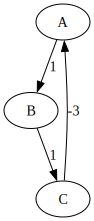

In [20]:


# Create a new directed graph
dot = Digraph()

# Add nodes
dot.node('A')
dot.node('B')
dot.node('C')

# Add edges with weights
dot.edge('A', 'B', label='1')
dot.edge('B', 'C', label='1')
dot.edge('C', 'A', label='-3')

# Render and view the graph
dot



a closed loop with repeated vertices except for the starting and ending vertex


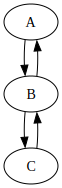

In [21]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph()

# Add nodes
dot.node('A')
dot.node('B')
dot.node('C')

# Add edges
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('C', 'B')
dot.edge('B', 'A')

# Render and view the graph
dot



### <font color='red'> Activity 1: Modify above code to do Bellman-Ford. Make sure you test for negative cycles and compare its performance with Dijkstra. </font>
* What are edges whose distances would be relatxed during the first round of relaxation?
* Why |V|-1 rather than |V|?
    1. What's |V|-1?
    + The reason we use \(|V| - 1\) iterations (where \(|V|\) is the number of vertices in the graph) in the Bellman-Ford algorithm is rooted in the properties of paths in a graph.
    + + For a simple path (a path with no repeated vertices) in a graph with \(|V|\) vertices, **the maximum number of edges that path can have is \(|V| - 1\)**. This is because every additional vertex we visit requires one more edge. 
     Consider a graph with 3 vertices: A, B, and C. The longest simple path you can have is A -> B -> C or the reverse, C -> B -> A, which has 2 edges, or \(3 - 1 = 2\).
  
    2. Why is this relevant to the Bellman-Ford algorithm? 
    + When we're trying to find the shortest path from a source vertex to all other vertices, we need to ensure that we've **considered paths that are as long as the longest possible simple path**. This is because the shortest path might actually be a longer path in terms of the number of edges it traverses (due to edge weights).
    + By iterating \(|V| - 1\) times and relaxing all edges during each iteration, we guarantee that we've considered paths of all possible lengths up to the maximum length of a simple path, \(|V| - 1\).
    + If after \(|V| - 1\) iterations we can still relax an edge and find a shorter path, it indicates the presence of a negative cycle in the graph. This is because the only way a path longer than \(|V| - 1\) edges can be shorter than paths we've already considered is if one of its edges has a negative weight, and we're looping through a cycle.
    + In summary, \(|V| - 1\) is the maximum number of edges in the longest simple path in a graph with \(|V|\) vertices. By relaxing all edges \(|V| - 1\) times, we ensure we've considered all possible shortest paths.

* Why does it relate to Dynamic Algorithm?

    + The final shortest paths to all nodes are only guaranteed at the end of all the \(|V| - 1\) iterations. However, the dynamic programming aspect of Bellman-Ford isn't about having the final solution to some subproblems early on, but rather about building up the solution iteratively using previously computed information. Let's clarify the dynamic programming aspect:

    + Can you demonstrate **overlapping subproblem** we want to solve? In each iteration, the algorithm is essentially solving the same problem: "For each edge (u, v), can we improve the shortest path to v by going through u?" This subproblem overlaps across iterations because the solution for one vertex can affect the solution for another vertex in the next iteration.

    + **Optimal Substructure**: The shortest path from a source vertex s to a vertex v can be broken down into finding the shortest path from s to some vertex u, and then from u to v. If we find a shorter path to u in one iteration, this can lead to a shorter path to v in a subsequent iteration.

    + **Memoization (Storing Solutions to Subproblems)**: The algorithm maintains the shortest path estimates for each vertex. These estimates are updated (or "relaxed") in each iteration based on the current knowledge. The key here is that the solution from one iteration (the current shortest path estimates) is used as a starting point for the next iteration. This iterative refinement is a hallmark of dynamic programming.

    + To your point: While it's true that the final shortest paths are only guaranteed at the end, the intermediate iterations are essential for building up to that solution. Each iteration refines the solution based on the paths discovered in the previous iterations. This process of building up the solution iteratively, using solutions to overlapping subproblems, aligns with the principles of dynamic programming.




In [18]:

#  (1) Modify Dijkstra's Algorithm in this week's lab to do a Bellman-Ford (BF) instead. Test if BF 
# can handle negative weights as well as negative cycles in the graph.

#### TODO ####
### Good Luck ###

def BellmanFord(w, G: Graph):

    for v in G.vertices:
        v.estD = math.inf
        
    w.estD = 0
    
    for _ in range(len(G.vertices)):
        for u in G.vertices:
            for v, wt in u.getOutNeighborsWithWeights():
                v.estD = min(v.estD, u.estD + wt)

    # check for negative cycle
    for u in G.vertices:        
        for v, wt in u.getOutNeighborsWithWeights():
            if min(v.estD, u.estD + wt) < v.estD:
                raise ValueError('The graph contains a negative cycle')

# Tests
G = Graph()
for i in ['A', 'B', 'C', 'D', 'E', 'F']:
    G.addVertex( Node(i) )
    
V = G.vertices

G.addDiEdge( V[0], V[1], -2)
G.addDiEdge( V[0], V[2], 3)
G.addDiEdge( V[1], V[4], -4)
G.addDiEdge( V[2], V[0], 2)
G.addDiEdge( V[2], V[4], 10)
G.addDiEdge( V[3], V[2], -1)
G.addDiEdge( V[3], V[5], 5)
G.addDiEdge( V[5], V[3], 8)
G.addDiEdge( V[5], V[4], -20)

print(G)

# test 1 - normal running
BellmanFord(V[0],G)

results = {(str(v), v.estD) for v in G.vertices}
if results == {('A', 0), ('B', -2), ('C', 3), ('D', math.inf), ('E', -6), ('F', math.inf)}:
    print('Test 1: Passed')
else:
    print('Test 1: Failed')

# test 2 - root as F this time
BellmanFord(V[5],G)

results = {(str(v), v.estD) for v in G.vertices}
if results == {('A', 9), ('B', 7), ('C', 7), ('D', 8), ('E', -20), ('F', 0)}:
    print('Test 2: Passed')
else:
    print('Test 2: Failed')

# test 3 - detect negative cycle
try:
    G.addDiEdge( V[4], V[0], -1)
    BellmanFord(V[0],G)
    print('\n')
    for v in V:
        print("{}: {}".format(v,v.estD))
    print('Test 3: Failed')
except ValueError:
    print('Test 3: Passed')








Graph with:
	 Vertices:
	A,B,C,D,E,F,
	 Edges:
	(A,B,-2) (A,C,3) (B,E,-4) (C,A,2) (C,E,10) (D,C,-1) (D,F,5) (F,D,8) (F,E,-20) 

Test 1: Passed
Test 2: Passed
Test 3: Passed


***

### <font color='red'> Activity 2: Implement Floyd-Warshal algorithm using above data structure (that is Node and Graph). Make sure to test all the use-cases. </font>
* On the first iteration (with k as the first vertex), the algorithm considers paths that pass through the first vertex. However, most of (u, v), (u, k) and (k, v) would be infinite. So I think only when k is the common neighbour of  u, v , the distance will be updated.

* After the algorithm has finished, inspect the diagonal of the distance matrix D. If any of the diagonal entries D[i][i] is negative, then there is a negative cycle in the graph.

Why? Because the diagonal represents the shortest path from a vertex to itself. In a graph without negative cycles, the shortest path from a vertex to itself should always be 0 (since a vertex doesn't need to travel anywhere to reach itself). However, if D[i][i] is negative, it means that there's a way to start at vertex i, travel around the graph, return to i, and end up with a net negative cost. This is only possible if the graph contains a negative cycle.


In [ ]:

# ■ (2) Write down the algorithm for Floyd-Warshall, and implement this in this weeks' lab notebook. Make sure you print the shortest path between each node. Make sure your algorithm 
# handles negative weights as well as negative cycles.
        


#### TODO ####
### Good Luck ###

def FloydWarshall(G: Graph) -> dict:
    # define an array of distances
    D = {(u,v) : math.inf for u in G.vertices for v in G.vertices}
    D.update({(u,u) : 0 for u in G.vertices}) # distance from a node to itself is 0
    D.update({(u,v) : wt for u in G.vertices for v, wt in u.getOutNeighborsWithWeights()}) # distance from a node to its neighbors is the weight of the edge

    paths = {(u,v) : [u,v] for u in G.vertices for v, _ in u.getOutNeighborsWithWeights()} # paths from a node to its neighbors is the node and its neighbor
    paths.update({(u,u) : [u] for u in G.vertices}) # path from a node to itself is just the node

    for k in G.vertices:
        for u, v in D.keys():
            if D[(u, v)] > D[(u, k)] + D[(k, v)]: # if the distance from u to v is greater than the distance from u to k plus the distance from k to v
                D[(u, v)] = D[(u, k)] + D[(k, v)]
                paths[(u, v)] = paths[(u,k)] + paths[(k,v)][1:]
    
    # check for negative cycles
    for k in G.vertices:
        for u, v in D.keys():
            if min(D[(u, v)], D[(u, k)] + D[(k, v)]) < D[(u, v)]:
                raise ValueError('The graph contains a negative cycle')

    return paths

# Tests
G = Graph()
for i in ['A', 'B', 'C', 'D', 'E', 'F']:
    G.addVertex( Node(i) )
    
V = G.vertices

G.addDiEdge( V[0], V[1], -2)
G.addDiEdge( V[0], V[2], 3)
G.addDiEdge( V[1], V[4], -4)
G.addDiEdge( V[2], V[0], 2)
G.addDiEdge( V[2], V[4], 10)
G.addDiEdge( V[3], V[2], -1)
G.addDiEdge( V[3], V[5], 5)
G.addDiEdge( V[5], V[3], 8)
G.addDiEdge( V[5], V[4], -20)

# test 1:
result = FloydWarshall(G)
for u, v in result.keys():
    print("{} -> {}: {}".format(u, v, [str(node) for node in result[(u, v)]]))
"""Yeah I am just going to eyeball this one"""

# test 2 - check for negative cycles
try:
    G.addDiEdge( V[4], V[0], -1)
    FloydWarshall(G)
    print('Test 2: Failed')
except ValueError:
    print('Test 2: Passed')



***

***